In [86]:
import numpy as np
from scipy import stats
from scipy.special import lambertw
import matplotlib.pyplot as plt


from gaussianizer import Gaussianize

%config InlineBackend.figure_format='retina'

In [2]:
y = np.random.standard_cauchy(size=10_000)

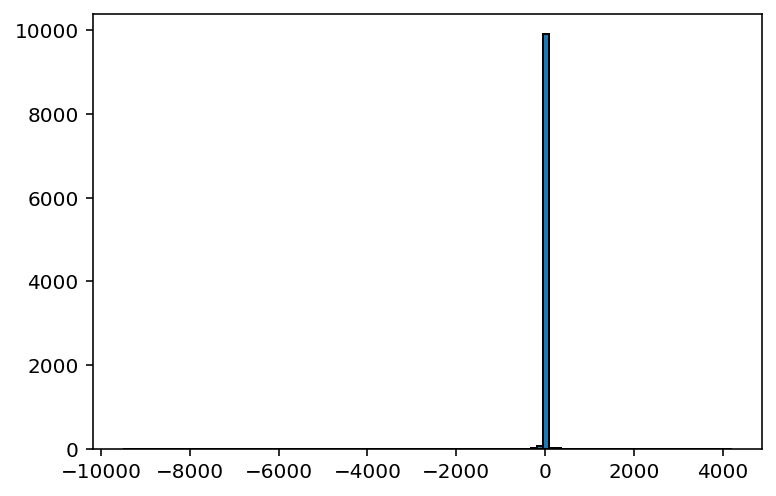

In [11]:
plt.hist(y, bins=100, edgecolor='black');

In [4]:
g = Gaussianize(strategy="lambert")

In [5]:
g.fit(y)

/Users/nathanieldake/development/intuitiveml/notebooks/Math-appendix/Probability/transforms/gaussianizer.py:164: UserWarning: Warning: No convergence after 100 iterations. Increase max_iter.
  warnings.warn(


In [6]:
x = g.transform(y)

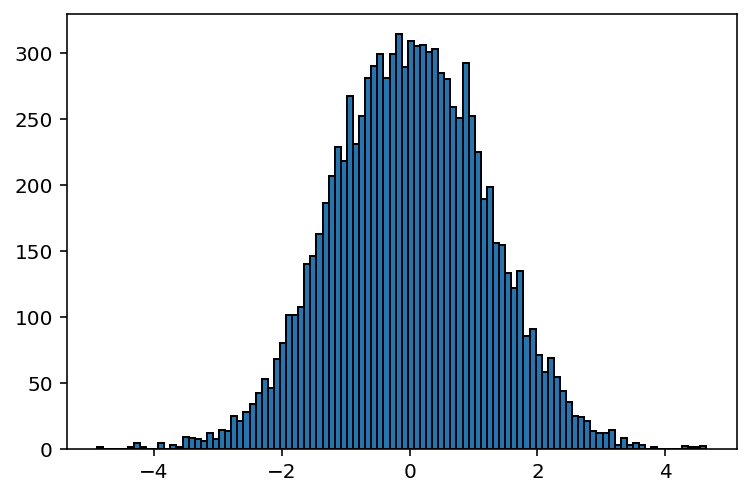

In [13]:
plt.hist(x, bins=100, edgecolor='black');

### Tukey's $H$
This can take gaussian distributed rvs and transform them to be more heavy tailed, where the "heavy-tailedness" is dependent on the parameter $h$. 

The problem is that there is no known *inverse transform* that can take us *back* from heavy tailed data to gaussian distributed data!

In [33]:
def tukey_h(u, h=0.0):
    return u * np.exp((h / 2) * u**2)

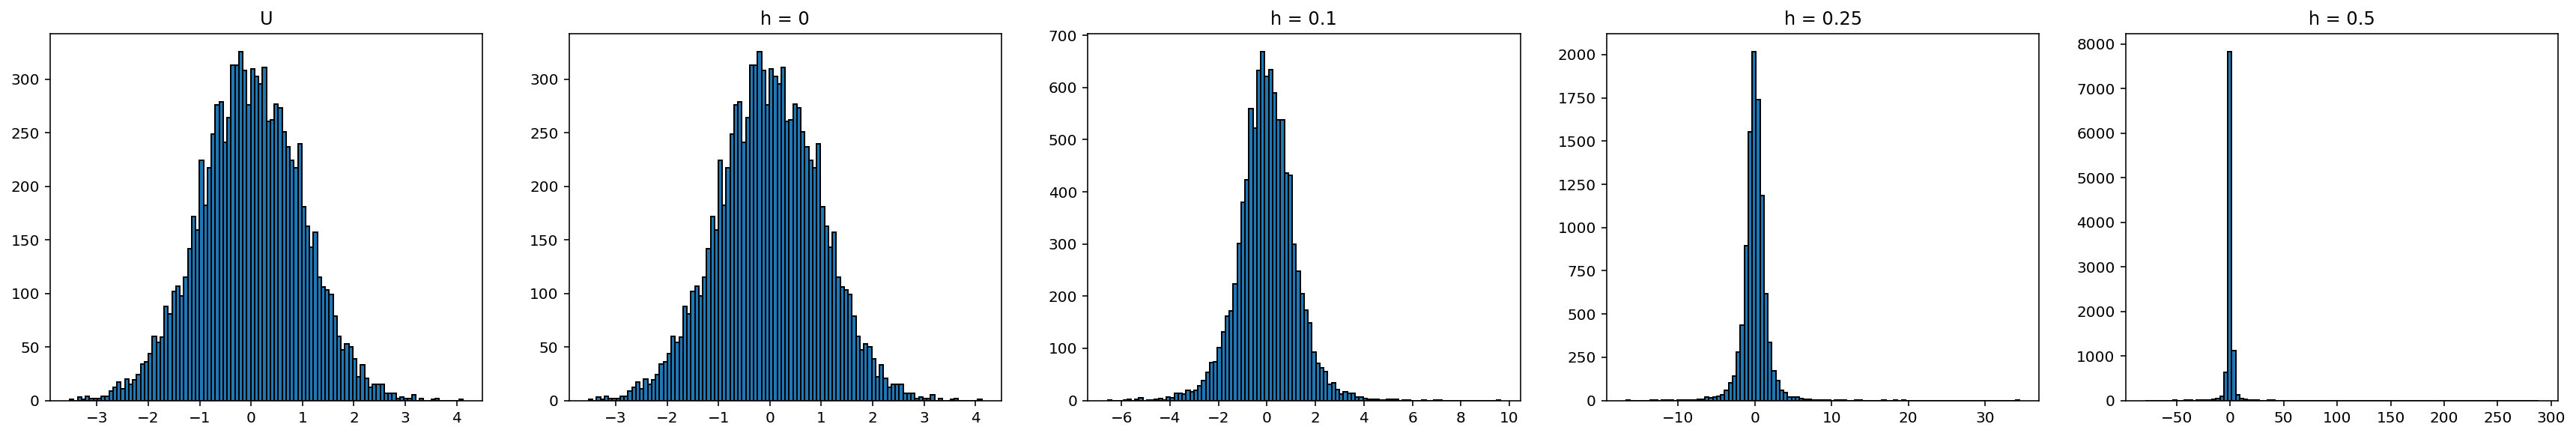

In [39]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(30, 4.5))

u = np.random.normal(size=10000)

ax1.hist(u, bins=100, edgecolor='black')
ax1.set_title('U')
ax2.hist(tukey_h(u, h=0), bins=100, edgecolor='black')
ax2.set_title('h = 0')
ax3.hist(tukey_h(u, h=0.1), bins=100, edgecolor='black')
ax3.set_title('h = 0.1')
ax4.hist(tukey_h(u, h=0.25), bins=100, edgecolor='black');
ax4.set_title('h = 0.25')
ax5.hist(tukey_h(u, h=0.5), bins=100, edgecolor='black');
ax5.set_title('h = 0.5');

### Different heavy tail parameters
What if the left and right tail have different heaviness? 

In [77]:
def tukey_h_skewed(u, delta_l=0.0, delta_r=0.0):
    return np.where(
        u <=0,
        u * np.exp((delta_l / 2) * u**2),
        u * np.exp((delta_r / 2) * u**2),
    )

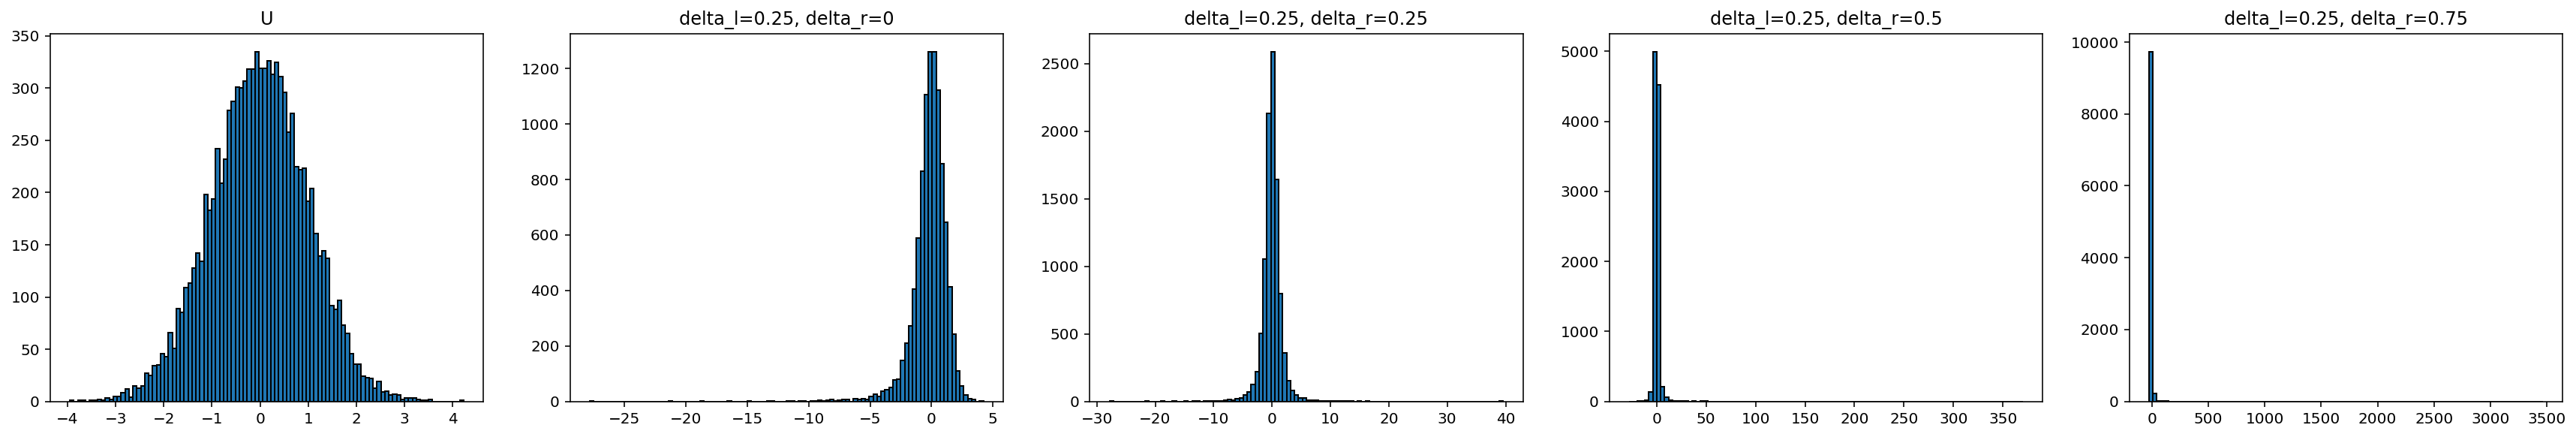

In [83]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(30, 4.5))

u = np.random.normal(size=10000)

ax1.hist(u, bins=100, edgecolor='black')
ax1.set_title('U')
ax2.hist(tukey_h_skewed(u, delta_l=0.25, delta_r=0), bins=100, edgecolor='black')
ax2.set_title('delta_l=0.25, delta_r=0')
ax3.hist(tukey_h_skewed(u, delta_l=0.25, delta_r=0.25), bins=100, edgecolor='black')
ax3.set_title('delta_l=0.25, delta_r=0.25')
ax4.hist(tukey_h_skewed(u, delta_l=0.25, delta_r=0.5), bins=100, edgecolor='black');
ax4.set_title('delta_l=0.25, delta_r=0.5')
ax5.hist(tukey_h_skewed(u, delta_l=0.25, delta_r=0.75), bins=100, edgecolor='black');
ax5.set_title('delta_l=0.25, delta_r=0.75');

### Lambert W is another way to introduce skewness!

/Users/nathanieldake/development/intuitiveml/venv/lib/python3.9/site-packages/numpy/lib/histograms.py:852: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/Users/nathanieldake/development/intuitiveml/venv/lib/python3.9/site-packages/matplotlib/transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


Text(0.5, 1.0, 'lambert_u')

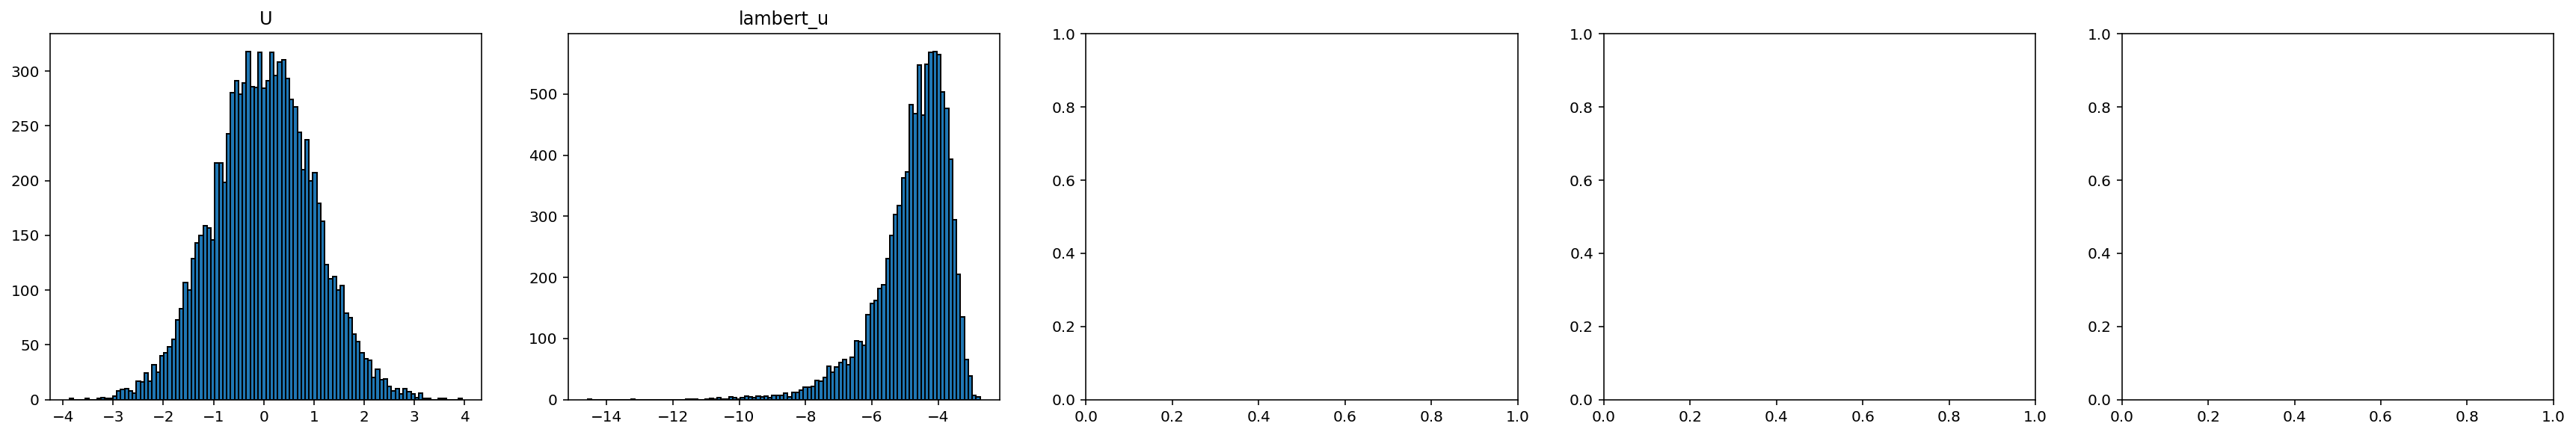

In [96]:
u = np.random.normal(size=10_000)

lambert_u= lambertw(u, k=10)

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(30, 4.5))

ax1.hist(u, bins=100, edgecolor='black')
ax1.set_title('U')
ax2.hist(lambert_u, bins=100, edgecolor='black')
ax2.set_title('lambert_u')
# ax3.hist(z**2, bins=100, edgecolor='black')
# ax3.set_title('z^2')
# ax4.hist(lambert_chi_square, bins=100, edgecolor='black');
# ax4.set_title('lambert_chi_square');
# # ax5.hist(tukey_h(u, h=0.5), bins=100, edgecolor='black');
# ax5.set_title('h = 0.5');